
과제 #1은 IRIS 데이터를 아래와 같이 불러와서    
간단한 전처리(스케일링 등)와 EDA를 하고,     
'#1_참고자료.html'을 참고하여 KNN에 GridSearchCV를 적용해보는 과제입니다!   
그리고 BestParameter와 BestScore, TestsetScore를 구합니다.

# Data & 패키지 import 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

#일반적인 경고 메세지는 무시함
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 아이리스 데이터 불러오기
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
#target name이 궁금쓰 
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### target data

setosa, versicolor, virginica의 세가지 붓꽃 종(species)

###### feature data

꽃받침 길이(Sepal Length)
꽃받침 폭(Sepal Width)
꽃잎 길이(Petal Length)
꽃잎 폭(Petal Width)

In [46]:
#iris.data -> features, iris.target -> labels
"""
X = iris.data
y = iris.target
"""
#dataframe 적용
X = pd.DataFrame(iris.data, columns = iris.feature_names)

y = pd.Series(iris.target, dtype="category")
y = y.cat.rename_categories(iris.target_names) 

In [47]:
X # X data 확인

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
y # y data 확인

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [49]:
import copy

#하나의 data frame으로 합치기
df = copy.copy(X)
df['species'] = copy.copy(y)

In [50]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- About data : https://www.kaggle.com/uciml/iris

# EDA

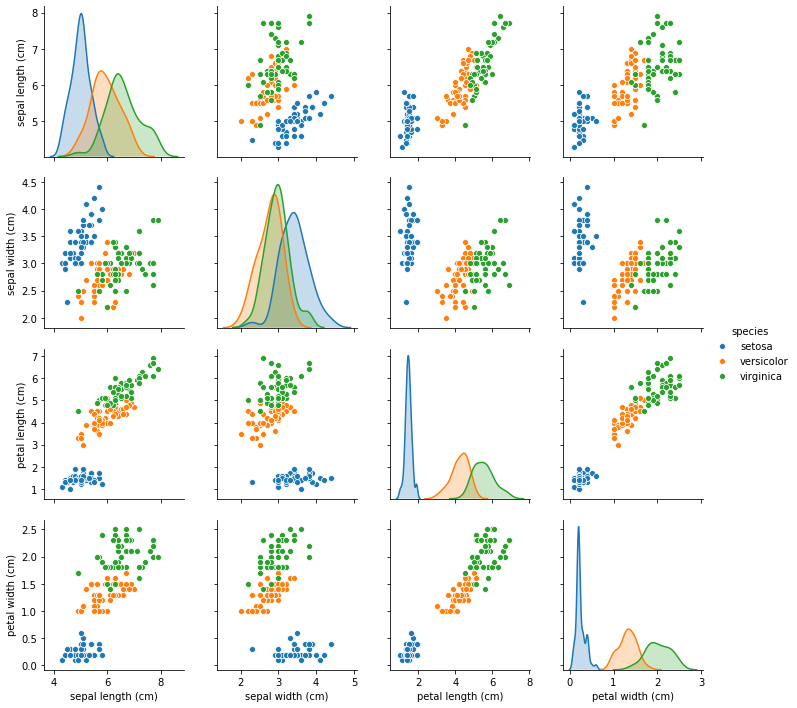

In [51]:
sns.pairplot(df, hue="species")
plt.show()

plot해서 본 결과 setosa가 다른 두 종과 구분된다. 
petal length과 petal width에서 잘 구분되는 것을 볼 수 있다.

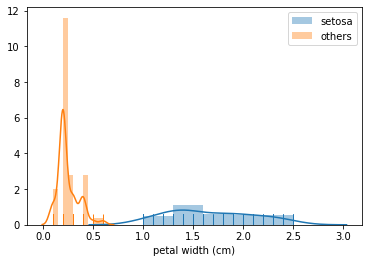

In [52]:
#종이 setosa인 것과 아닌것의 petal width비교
sns.distplot(df[df.species != "setosa"]["petal width (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species == "setosa"]["petal width (cm)"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

petal width 0.5부근에서 setosa와 others가 살짝 겹침

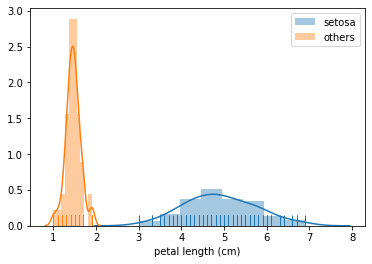

In [53]:
# 종이 setosa인 것과 아닌것의 petal length 비교
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

petal length로 setosa를 분류할 수 있다.

# preprocessing

In [54]:
# Train, Test 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48)

In [55]:
#크기 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [56]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
110,6.5,3.2,5.1,2.0
69,5.6,2.5,3.9,1.1
148,6.2,3.4,5.4,2.3
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
...,...,...,...,...
64,5.6,2.9,3.6,1.3
91,6.1,3.0,4.6,1.4
81,5.5,2.4,3.7,1.0
51,6.4,3.2,4.5,1.5


Scaling은 Split한 후에 진행

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # X_scaled

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size = 0.2, random_state=48)


In [60]:
X_train

array([[0.61111111, 0.5       , 0.69491525, 0.79166667],
       [0.36111111, 0.20833333, 0.49152542, 0.41666667],
       [0.52777778, 0.58333333, 0.74576271, 0.91666667],
       [0.22222222, 0.58333333, 0.08474576, 0.04166667],
       [0.33333333, 0.125     , 0.50847458, 0.5       ],
       [0.55555556, 0.375     , 0.77966102, 0.70833333],
       [0.5       , 0.41666667, 0.66101695, 0.70833333],
       [0.47222222, 0.375     , 0.59322034, 0.58333333],
       [0.02777778, 0.41666667, 0.05084746, 0.04166667],
       [0.38888889, 0.33333333, 0.52542373, 0.5       ],
       [0.38888889, 0.25      , 0.42372881, 0.375     ],
       [0.5       , 0.33333333, 0.50847458, 0.5       ],
       [0.58333333, 0.29166667, 0.72881356, 0.75      ],
       [0.44444444, 0.41666667, 0.69491525, 0.70833333],
       [0.30555556, 0.41666667, 0.59322034, 0.58333333],
       [0.36111111, 0.33333333, 0.66101695, 0.79166667],
       [0.94444444, 0.75      , 0.96610169, 0.875     ],
       [0.30555556, 0.79166667,

음 scaling이 잘됐군!!

- Documentation for "KNeighborsClassifier" : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [61]:
# build KNN model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

In [62]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [63]:
# get the predict value(y_pred) from X_test
y_pred = knn.predict(X_test)

In [64]:
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9333333333333333


In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# grid parameter설정
grid_params = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [67]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
    )

In [68]:
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.8s finished


16 = 4(4_neighbors)X2(2_weights)X2(2_metric)

In [69]:
#가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [70]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))

Best Cross-validity Score: 0.975


In [71]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Test set Score: 1.000


## n_neighbors만

In [72]:
#GridSearch의 범위를 1에서 10까지로 지정함
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [73]:
#KNN 알고리즘에 GridSearch를 적용함
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [74]:
#Train 데이터에 GridSearch를 적용함
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [75]:
#가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 5}


In [76]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.975


In [77]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 1.000


grid parameter를 설정한 경우와 n_neighbor만 설정한 경의의 Test set Score가 1로 동일하게 나온다.
n_neighbors의 best parameter인  5가 두 경우 모두 포함되어있고 
weights와 metric의 best parameter인 uniform과 euclidean이도 두 경우 모두 포함되었기 때문이다.(grid parameter에선 지정해주었고 n_neighbor에선 default)

In [78]:
result_grid = pd.DataFrame(grid_search.cv_results_)

In [79]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002192,3.946071e-04,0.002993,6.306009e-04,1,{'n_neighbors': 1},1.000000,0.875000,1.000000,0.958333,...,0.958333,0.045644,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000997,4.422006e-07,0.001994,9.368364e-07,2,{'n_neighbors': 2},0.958333,0.916667,0.958333,0.958333,...,0.950000,0.016667,9,0.968750,0.989583,0.968750,0.968750,0.979167,0.975000,0.008333
2,0.000997,5.352484e-07,0.001796,3.990416e-04,3,{'n_neighbors': 3},1.000000,0.916667,1.000000,0.958333,...,0.966667,0.031180,4,0.958333,0.979167,0.958333,0.979167,0.958333,0.966667,0.010206
3,0.001197,3.987551e-04,0.001994,1.507891e-07,4,{'n_neighbors': 4},1.000000,0.916667,1.000000,0.958333,...,0.966667,0.031180,4,0.958333,0.979167,0.958333,0.968750,0.979167,0.968750,0.009317
4,0.000997,5.560829e-07,0.002002,1.416648e-05,5,{'n_neighbors': 5},1.000000,0.958333,1.000000,0.958333,...,0.975000,0.020412,1,0.968750,0.979167,0.958333,0.979167,0.979167,0.972917,0.008333
5,0.001396,4.889865e-04,0.002393,7.970097e-04,6,{'n_neighbors': 6},1.000000,0.958333,1.000000,0.958333,...,0.975000,0.020412,1,0.968750,0.979167,0.968750,0.979167,0.979167,0.975000,0.005103
6,0.001796,3.998567e-04,0.001994,6.297711e-04,7,{'n_neighbors': 7},1.000000,0.958333,1.000000,0.958333,...,0.975000,0.020412,1,0.979167,0.979167,0.968750,0.968750,0.979167,0.975000,0.005103
7,0.001389,4.952599e-04,0.001795,3.987790e-04,8,{'n_neighbors': 8},0.916667,0.958333,1.000000,0.958333,...,0.958333,0.026352,6,0.968750,0.979167,0.958333,0.979167,0.968750,0.970833,0.007795
8,0.001596,4.885798e-04,0.001589,4.827341e-04,9,{'n_neighbors': 9},0.916667,0.958333,1.000000,0.958333,...,0.958333,0.026352,6,0.968750,0.979167,0.958333,0.979167,0.979167,0.972917,0.008333
9,0.001196,3.994951e-04,0.001994,1.939268e-06,10,{'n_neighbors': 10},0.916667,0.916667,1.000000,0.958333,...,0.950000,0.031180,9,0.979167,0.979167,0.958333,0.979167,0.968750,0.972917,0.008333


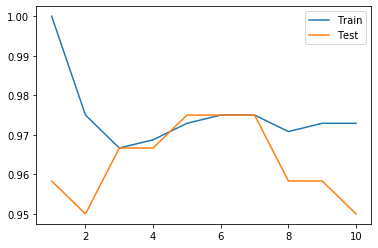

In [80]:
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

train과 test의 차이가 적은 parameter(이 경우 n_neighbors)를 선택해야 한다.
이 경우 train과 test가 같은 parameter가 여러개 나오는데,
그중 test가 가장 높은 6,7이 최적의 parameter이다.
(train set에 gridsearch를 적용하여 찾은 best parameter는 5였지만, 
test set까지 고려하였을 때 6,7이 더 적합하다고 판단된다)
